# Stock Price Prediction

import libraries

In [3]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.utils import shuffle
import random
 

# Data Set

In [4]:
#import dataset
data1 = pd.read_csv("all_stocks_5yr.csv")
dc=data1[['date','close','Name']]
bb=dc.pivot(index='date', columns='Name', values='close').iloc[:,0:52].drop(['APTV','ALLE'], axis=1)

In [5]:
bb.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,ANTM,AON,AOS,APA,APC,APD,APH,ARE,ARNC,ATVI
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,66.28,56.53,17.4875,84.65,84.45,88.35,35.220,72.62,26.82,13.41
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,66.01,56.66,17.4775,83.81,83.47,88.42,35.205,72.73,26.61,13.57
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,66.01,56.70,17.6325,84.18,83.45,88.83,35.200,72.79,27.09,13.51
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,63.00,57.28,17.7625,84.33,84.13,88.78,35.055,72.36,27.30,13.73
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,63.29,57.30,17.8525,80.33,84.00,88.69,35.050,71.56,27.87,14.00


# Processing of time series

In [6]:
bba=bb.iloc[:,:52].reset_index(drop=True)
bba.head()

Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,ANTM,AON,AOS,APA,APC,APD,APH,ARE,ARNC,ATVI
0,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,66.28,56.53,17.4875,84.65,84.45,88.35,35.220,72.62,26.82,13.41
1,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,66.01,56.66,17.4775,83.81,83.47,88.42,35.205,72.73,26.61,13.57
2,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,66.01,56.70,17.6325,84.18,83.45,88.83,35.200,72.79,27.09,13.51
3,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,63.00,57.28,17.7625,84.33,84.13,88.78,35.055,72.36,27.30,13.73
4,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,63.29,57.30,17.8525,80.33,84.00,88.69,35.050,71.56,27.87,14.00


In [7]:
#Check that no missing values
bba.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1254    0
1255    0
1256    0
1257    0
1258    0
Length: 1259, dtype: int64

In [8]:
bb.shape

(1259, 50)

In [9]:
data = bba

In [10]:
#data_mm.head()
data_mm=data.mean()
print('Normalized Data')
#normalized Yij
df=data/data_mm
df

Normalized Data


Name,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,ANTM,AON,AOS,APA,APC,APD,APH,ARE,ARNC,ATVI
0,0.916222,0.384182,0.595771,0.622135,0.595586,0.571182,0.801345,0.724987,0.432465,0.750017,...,0.493587,0.570327,0.479627,1.321143,1.169016,0.666201,0.619275,0.789471,0.854092,0.409600
1,0.906467,0.376629,0.591920,0.628619,0.589014,0.569598,0.797851,0.722613,0.427159,0.756254,...,0.491577,0.571638,0.479352,1.308033,1.155450,0.666729,0.619012,0.790667,0.847405,0.414487
2,0.906873,0.371680,0.593506,0.612862,0.581949,0.572034,0.798783,0.725580,0.429923,0.759372,...,0.491577,0.572042,0.483604,1.313808,1.155174,0.669820,0.618924,0.791319,0.862691,0.412654
3,0.909515,0.381838,0.596299,0.611695,0.579485,0.568136,0.802509,0.727459,0.429038,0.759208,...,0.469161,0.577893,0.487169,1.316149,1.164587,0.669443,0.616374,0.786644,0.869378,0.419374
4,0.906060,0.364387,0.595318,0.611145,0.600843,0.569720,0.808098,0.723207,0.426827,0.763803,...,0.471321,0.578095,0.489637,1.253721,1.162787,0.668764,0.616286,0.777947,0.887530,0.427621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1.480224,1.403372,0.885652,1.538325,1.911461,1.209482,1.448056,1.586842,2.204113,1.504137,...,1.816547,1.457647,1.831838,0.697483,0.849527,1.257675,1.632059,1.361299,0.958864,2.240428
1255,1.448111,1.357009,0.860281,1.471577,1.892238,1.169649,1.436645,1.551636,2.162768,1.462452,...,1.781174,1.448668,1.772870,0.668297,0.818242,1.227890,1.604454,1.349340,0.927018,2.181477
1256,1.386528,1.296061,0.829549,1.434810,1.799244,1.119462,1.367712,1.501497,2.103403,1.401564,...,1.716161,1.415879,1.688395,0.638800,0.786958,1.178802,1.554518,1.303246,0.844539,2.076405
1257,1.391203,1.333047,0.847218,1.494773,1.827011,1.115077,1.370739,1.529781,2.149834,1.453097,...,1.748779,1.411642,1.709240,0.641765,0.795817,1.208134,1.557156,1.288679,0.805051,2.128941


# Create Training and Test sets for MLP 

In [11]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

# forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

#  Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [12]:
# frame as supervised learning
reframed = series_to_supervised(df, 4, 2)  ### specify how many days to look back ###
# drop columns we don't want to predict
Xt=reframed.iloc[:,:250]
Yt=reframed.iloc[:,-1]
print('Dimension on Xt and TARGt')
Xt.shape, Yt.shape

Dimension on Xt and TARGt


((1254, 250), (1254,))

In [115]:
Xt

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var5(t-4),var6(t-4),var7(t-4),var8(t-4),var9(t-4),var10(t-4),...,var41(t),var42(t),var43(t),var44(t),var45(t),var46(t),var47(t),var48(t),var49(t),var50(t)
4,0.916222,0.384182,0.595771,0.622135,0.595586,0.571182,0.801345,0.724987,0.432465,0.750017,...,0.471321,0.578095,0.489637,1.253721,1.162787,0.668764,0.616286,0.777947,0.887530,0.427621
5,0.906467,0.376629,0.591920,0.628619,0.589014,0.569598,0.797851,0.722613,0.427159,0.756254,...,0.466927,0.575068,0.493477,1.199408,1.136209,0.665296,0.619099,0.778599,0.890396,0.438922
6,0.906873,0.371680,0.593506,0.612862,0.581949,0.572034,0.798783,0.725580,0.429923,0.759372,...,0.467448,0.584249,0.496426,1.206431,1.164587,0.668840,0.623232,0.781861,0.865557,0.446864
7,0.909515,0.381838,0.596299,0.611695,0.579485,0.568136,0.802509,0.727459,0.429038,0.759208,...,0.466033,0.595448,0.482506,1.178026,1.112538,0.660621,0.610923,0.781209,0.836896,0.434952
8,0.906060,0.364387,0.595318,0.611145,0.600843,0.569720,0.808098,0.723207,0.426827,0.763803,...,0.467001,0.599484,0.476267,1.172251,1.110323,0.645992,0.609077,0.776534,0.827342,0.436173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1.501158,1.381753,0.913062,1.568857,1.779364,1.271363,1.472276,1.590105,2.183440,1.509553,...,1.845739,1.434342,1.831563,0.700292,0.831254,1.269589,1.631180,1.410002,0.957271,2.264253
1254,1.520669,1.382274,0.933601,1.572524,2.024335,1.284885,1.476933,1.607511,2.225338,1.540079,...,1.816547,1.457647,1.831838,0.697483,0.849527,1.257675,1.632059,1.361299,0.958864,2.240428
1255,1.514775,1.372116,0.927938,1.539975,2.009548,1.280134,1.474372,1.594061,2.191400,1.539094,...,1.781174,1.448668,1.772870,0.668297,0.818242,1.227890,1.604454,1.349340,0.927018,2.181477
1256,1.483476,1.369772,0.900603,1.530898,1.903903,1.248097,1.454111,1.579326,2.176697,1.502496,...,1.716161,1.415879,1.688395,0.638800,0.786958,1.178802,1.554518,1.303246,0.844539,2.076405


In [13]:
x_train, x_test, y_train, y_test = train_test_split(Xt, Yt, test_size=0.1, random_state=1)
print('Dimension of train and test')
x_train.shape, x_test.shape

Dimension of train and test


((1128, 250), (126, 250))

# Auto Encoder to compress input file

Compute a plausible dimension h for H

h100: 250


<IPython.core.display.Javascript object>


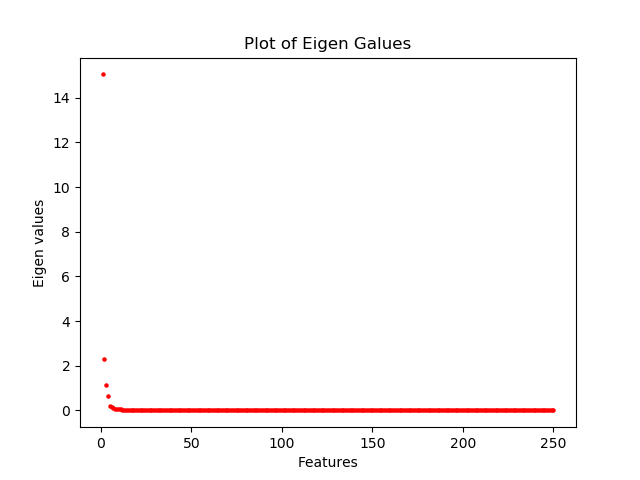

In [14]:
pca1=PCA(0.9999999999)
pca1.fit(x_train)
h100=pca1.n_components_
print('h100:',h100)
vals1=pca1.explained_variance_ #get eigen values
Lj=vals1.tolist()
j=list(range(1,len(Lj)+1))
%matplotlib notebook
plt.scatter(j,Lj,c='red',s=5)
plt.title('Plot of Eigen Galues')
plt.xlabel('Features')
plt.ylabel('Eigen values')
print('\n')

<IPython.core.display.Javascript object>


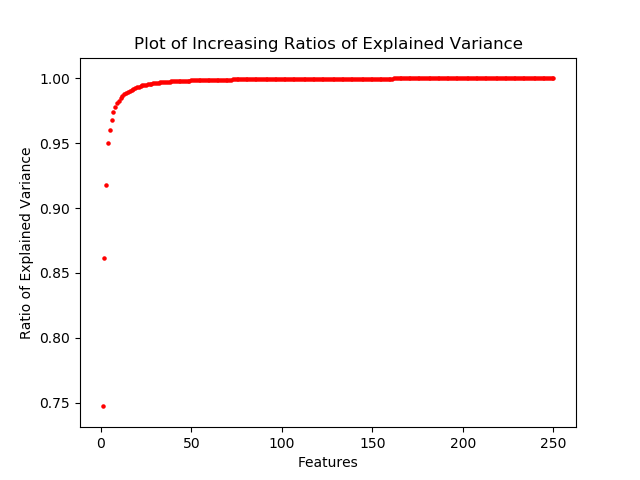

Text(0.5, 0, 'Features')

In [15]:
%matplotlib notebook
x=pd.DataFrame(Lj).cumsum()
RATj=x/sum(Lj)
plt.scatter(j,RATj,c='red',s=5)
plt.title('Plot of Increasing Ratios of Explained Variance')
plt.ylabel('Ratio of Explained Variance')
plt.xlabel('Features')

Number of components, h90: 3
eigen values from x_train: 
 [15.04, 2.31, 1.13]


Text(0.5, 1.0, 'Plot of x_train Eigen Values')

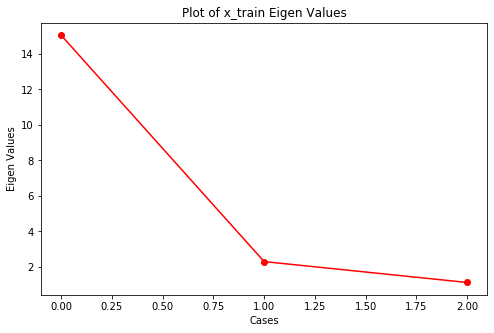

In [16]:
pca=PCA(0.90)
pca.fit(x_train)
h90=pca.n_components_
print('Number of components, h90:',h90)
eigval_train=pca.explained_variance_ #get eigen values
round_eig=[round(num, 2) for num in eigval_train]
print('eigen values from x_train:','\n',round_eig)

#plot eigen values
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.figure(1)
plt.plot(eigval_train,  marker='o', label='Eigen Values', color='r')
plt.ylabel('Eigen Values')
plt.xlabel('Cases')
plt.title('Plot of x_train Eigen Values')

# AutoEncoder Training

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import Constant

# constructing the autoencoder

# determine h through PCA on your own data
# try to find suitable initializers for your own data
h = h90
model = Sequential()
model.add(Dense(h, activation='relu', input_dim=250, bias_initializer=Constant(value=10)))
model.add(Dense(250, activation='relu', bias_initializer=Constant(value=5)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 753       
_________________________________________________________________
dense_1 (Dense)              (None, 250)               1000      
Total params: 1,753
Trainable params: 1,753
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras import optimizers, losses

model.compile(optimizer=optimizers.SGD(learning_rate=0.05, decay=1e-7), loss='mean_squared_error')
from tensorflow.keras import callbacks

# the following callback to record losses after each batch
class MyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(x_train,x_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(x_test,x_test,verbose = 0))

MyMonitor = MyHistory()

# Keras built-in early-stopping callback
# https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping
es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000, restore_best_weights=True)

In [19]:
Monitor = model.fit(x_train, x_train, epochs=300, batch_size=100, callbacks = [MyMonitor, es], validation_data = (x_test, x_test), verbose = 2)

# After training, access MSE(AutoTrain) and MSE(AutoTest) through MyMonitor.MSEtrain and MyMonitor.MSEtest.

Train on 1128 samples, validate on 126 samples
Epoch 1/300
1128/1128 - 1s - loss: 7.6841 - val_loss: 0.3243
Epoch 2/300
1128/1128 - 0s - loss: 0.2943 - val_loss: 0.2236
Epoch 3/300
1128/1128 - 0s - loss: 0.2316 - val_loss: 0.1735
Epoch 4/300
1128/1128 - 0s - loss: 0.1819 - val_loss: 0.1475
Epoch 5/300
1128/1128 - 0s - loss: 0.1522 - val_loss: 0.1237
Epoch 6/300
1128/1128 - 0s - loss: 0.1348 - val_loss: 0.1149
Epoch 7/300
1128/1128 - 0s - loss: 0.1230 - val_loss: 0.1123
Epoch 8/300
1128/1128 - 0s - loss: 0.1109 - val_loss: 0.0882
Epoch 9/300
1128/1128 - 0s - loss: 0.0956 - val_loss: 0.0809
Epoch 10/300
1128/1128 - 0s - loss: 0.0915 - val_loss: 0.0789
Epoch 11/300
1128/1128 - 0s - loss: 0.0884 - val_loss: 0.0726
Epoch 12/300
1128/1128 - 0s - loss: 0.0794 - val_loss: 0.0647
Epoch 13/300
1128/1128 - 0s - loss: 0.0730 - val_loss: 0.0606
Epoch 14/300
1128/1128 - 0s - loss: 0.0685 - val_loss: 0.0588
Epoch 15/300
1128/1128 - 0s - loss: 0.0674 - val_loss: 0.0582
Epoch 16/300
1128/1128 - 0s - lo

1128/1128 - 0s - loss: 0.0435 - val_loss: 0.0390
Epoch 133/300
1128/1128 - 0s - loss: 0.0433 - val_loss: 0.0387
Epoch 134/300
1128/1128 - 0s - loss: 0.0431 - val_loss: 0.0388
Epoch 135/300
1128/1128 - 0s - loss: 0.0429 - val_loss: 0.0386
Epoch 136/300
1128/1128 - 0s - loss: 0.0427 - val_loss: 0.0387
Epoch 137/300
1128/1128 - 0s - loss: 0.0426 - val_loss: 0.0383
Epoch 138/300
1128/1128 - 0s - loss: 0.0423 - val_loss: 0.0385
Epoch 139/300
1128/1128 - 0s - loss: 0.0421 - val_loss: 0.0377
Epoch 140/300
1128/1128 - 0s - loss: 0.0418 - val_loss: 0.0377
Epoch 141/300
1128/1128 - 0s - loss: 0.0416 - val_loss: 0.0374
Epoch 142/300
1128/1128 - 0s - loss: 0.0414 - val_loss: 0.0371
Epoch 143/300
1128/1128 - 0s - loss: 0.0412 - val_loss: 0.0370
Epoch 144/300
1128/1128 - 0s - loss: 0.0409 - val_loss: 0.0368
Epoch 145/300
1128/1128 - 0s - loss: 0.0408 - val_loss: 0.0371
Epoch 146/300
1128/1128 - 0s - loss: 0.0405 - val_loss: 0.0363
Epoch 147/300
1128/1128 - 0s - loss: 0.0402 - val_loss: 0.0361
Epoch 

Epoch 263/300
1128/1128 - 0s - loss: 0.0177 - val_loss: 0.0175
Epoch 264/300
1128/1128 - 0s - loss: 0.0177 - val_loss: 0.0171
Epoch 265/300
1128/1128 - 0s - loss: 0.0176 - val_loss: 0.0171
Epoch 266/300
1128/1128 - 0s - loss: 0.0176 - val_loss: 0.0171
Epoch 267/300
1128/1128 - 0s - loss: 0.0175 - val_loss: 0.0171
Epoch 268/300
1128/1128 - 0s - loss: 0.0175 - val_loss: 0.0172
Epoch 269/300
1128/1128 - 0s - loss: 0.0175 - val_loss: 0.0171
Epoch 270/300
1128/1128 - 0s - loss: 0.0174 - val_loss: 0.0170
Epoch 271/300
1128/1128 - 0s - loss: 0.0174 - val_loss: 0.0171
Epoch 272/300
1128/1128 - 0s - loss: 0.0173 - val_loss: 0.0169
Epoch 273/300
1128/1128 - 0s - loss: 0.0173 - val_loss: 0.0171
Epoch 274/300
1128/1128 - 0s - loss: 0.0173 - val_loss: 0.0169
Epoch 275/300
1128/1128 - 0s - loss: 0.0172 - val_loss: 0.0168
Epoch 276/300
1128/1128 - 0s - loss: 0.0172 - val_loss: 0.0167
Epoch 277/300
1128/1128 - 0s - loss: 0.0172 - val_loss: 0.0170
Epoch 278/300
1128/1128 - 0s - loss: 0.0171 - val_loss:

In [20]:
eval=model.evaluate(x_test, x_test)
print('loss')
round(eval,3)

126/126 [==============================] - 0s 48us/sample - loss: 0.0163
loss


0.016

Text(0.5, 1.0, 'Plot of MSEAutoTrain and MSEAutoTest from Autoencoder')

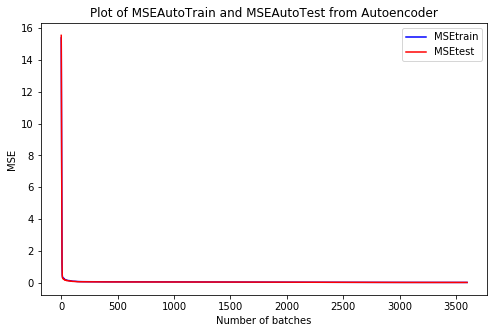

In [21]:
#plot MSE
labels=['MSEtrain','MSEtest']
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.figure(1)
plt.plot(MyMonitor.MSEtrain, label='MSEAutoTrain', color='b')
plt.plot(MyMonitor.MSEtest, label='MSEAutoTest', color='r')
plt.legend(labels)
plt.ylabel('MSE')
plt.xlabel('Number of batches')
plt.title('Plot of MSEAutoTrain and MSEAutoTest from Autoencoder')

Compute Compressed Inputs

In [22]:
# extract the hidden layer
Htrain = model.layers[0](np.asarray(x_train)).numpy()
Htest = model.layers[0](np.asarray(x_test)).numpy()
print(Htrain.shape)
Htrain

(1128, 3)


array([[10.879543 , 12.2064295, 11.582977 ],
       [12.381304 , 12.3067255,  5.245779 ],
       [10.679415 , 10.988287 , 10.916448 ],
       ...,
       [12.039141 , 12.153407 ,  6.757164 ],
       [10.535016 , 11.84597  , 11.22563  ],
       [11.655713 , 11.67267  ,  7.2585554]], dtype=float32)

In [23]:
  Htrain.shape,Htest.shape

((1128, 3), (126, 3))

In [24]:
y_train=pd.DataFrame(y_train).values.reshape(1128,1)
y_test=pd.DataFrame(y_test).values.reshape(126,1)

# MLP predictor (deep learning method)

In [74]:
# K=10
mlp10 = Sequential()
mlp10.add(Dense(10, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp10.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp10.summary()
mlp10.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlp10.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor10 = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor10 = mlp10.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor10, es], validation_data = (Htest, y_test), verbose = 2)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 10)                40        
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
Train on 1128 samples, validate on 126 samples
Epoch 1/50
1128/1128 - 0s - loss: 9.2913 - val_loss: 0.7088
Epoch 2/50
1128/1128 - 0s - loss: 0.5042 - val_loss: 0.1995
Epoch 3/50
1128/1128 - 0s - loss: 0.2206 - val_loss: 0.1748
Epoch 4/50
1128/1128 - 0s - loss: 0.2031 - val_loss: 0.1745
Epoch 5/50
1128/1128 - 0s - loss: 0.2014 - val_loss: 0.1742
Epoch 6/50
1128/1128 - 0s - loss: 0.2010 - val_loss: 0.1738
Epoch 7/50
1128/1128 - 0s - loss: 0.2001 - val_loss: 0.1739
Epoch 8/50
1128/1128 - 0s - loss: 0.1998 - val_loss:

In [75]:
z_train10=mlp10.predict(Htrain)
MREPtrain10=np.average(abs(z_train10-y_train)/y_train)
print('k=10, MREP_train:',round(MREPtrain10,3))

k=10, MREP_train: 0.444


In [76]:
# K=30
mlp30 = Sequential()
mlp30.add(Dense(30, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp30.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp30.summary()
mlp30.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlp30.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor30 = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor30 = mlp30.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor30, es], validation_data = (Htest, y_test), verbose = 2)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 30)                120       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 31        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Train on 1128 samples, validate on 126 samples
Epoch 1/50
1128/1128 - 0s - loss: 367.6738 - val_loss: 3.0259
Epoch 2/50
1128/1128 - 0s - loss: 1.1735 - val_loss: 0.1447
Epoch 3/50
1128/1128 - 0s - loss: 0.1499 - val_loss: 0.1332
Epoch 4/50
1128/1128 - 0s - loss: 0.1411 - val_loss: 0.1326
Epoch 5/50
1128/1128 - 0s - loss: 0.1407 - val_loss: 0.1323
Epoch 6/50
1128/1128 - 0s - loss: 0.1400 - val_loss: 0.1319
Epoch 7/50
1128/1128 - 0s - loss: 0.1395 - val_loss: 0.1316
Epoch 8/50
1128/1128 - 0s - loss: 0.1390 - val_l

In [78]:
z_train30=mlp30.predict(Htrain)
MREPtrain30=np.average(abs(z_train30-y_train)/y_train)
print('k=30, MREP_train:',round(MREPtrain30,3))

k=30, MREP_train: 0.385


In [79]:
# K=50
mlp50 = Sequential()
mlp50.add(Dense(50, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp50.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp50.summary()
mlp50.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlp50.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor50 = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor50 = mlp50.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor50, es], validation_data = (Htest, y_test), verbose = 2)

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 50)                200       
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 51        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
Train on 1128 samples, validate on 126 samples
Epoch 1/50
1128/1128 - 0s - loss: 553.6958 - val_loss: 3.7321
Epoch 2/50
1128/1128 - 0s - loss: 1.3334 - val_loss: 0.0706
Epoch 3/50
1128/1128 - 0s - loss: 0.0716 - val_loss: 0.0643
Epoch 4/50
1128/1128 - 0s - loss: 0.0693 - val_loss: 0.0643
Epoch 5/50
1128/1128 - 0s - loss: 0.0692 - val_loss: 0.0642
Epoch 6/50
1128/1128 - 0s - loss: 0.0693 - val_loss: 0.0639
Epoch 7/50
1128/1128 - 0s - loss: 0.0690 - val_loss: 0.0637
Epoch 8/50
1128/1128 - 0s - loss: 0.0687 - val_l

In [80]:
z_train50=mlp50.predict(Htrain)
MREPtrain50=np.average(abs(z_train50-y_train)/y_train)
print('k=50, MREP_train:',round(MREPtrain50,3))

k=50, MREP_train: 0.289


In [81]:
# K=100
mlp100 = Sequential()
mlp100.add(Dense(100, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp100.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp100.summary()
mlp100.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlp100.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor100 = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor100 = mlp100.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor100, es], validation_data = (Htest, y_test), verbose = 2)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
Train on 1128 samples, validate on 126 samples
Epoch 1/50
1128/1128 - 1s - loss: 608.7245 - val_loss: 0.1285
Epoch 2/50
1128/1128 - 0s - loss: 0.1446 - val_loss: 0.1231
Epoch 3/50
1128/1128 - 0s - loss: 0.1367 - val_loss: 0.1221
Epoch 4/50
1128/1128 - 0s - loss: 0.1354 - val_loss: 0.1202
Epoch 5/50
1128/1128 - 0s - loss: 0.1333 - val_loss: 0.1181
Epoch 6/50
1128/1128 - 0s - loss: 0.1314 - val_loss: 0.1167
Epoch 7/50
1128/1128 - 0s - loss: 0.1297 - val_loss: 0.1165
Epoch 8/50
1128/1128 - 0s - loss: 0.1282 - val_l

In [82]:
z_train100=mlp100.predict(Htrain)
MREPtrain100=np.average(abs(z_train100-y_train)/y_train)
print('k=100, MREP_train:',round(MREPtrain100,3))

k=100, MREP_train: 0.287


In [83]:
# K=150
mlp150 = Sequential()
mlp150.add(Dense(150, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp150.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp150.summary()
mlp150.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlp150.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor150 = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor150 = mlp150.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor150, es], validation_data = (Htest, y_test), verbose = 2)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 150)               600       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 151       
Total params: 751
Trainable params: 751
Non-trainable params: 0
_________________________________________________________________
Train on 1128 samples, validate on 126 samples
Epoch 1/50
1128/1128 - 0s - loss: 620.1870 - val_loss: 1.0633
Epoch 2/50
1128/1128 - 0s - loss: 1.1788 - val_loss: 0.9490
Epoch 3/50
1128/1128 - 0s - loss: 0.8651 - val_loss: 0.4921
Epoch 4/50
1128/1128 - 0s - loss: 0.2466 - val_loss: 0.0927
Epoch 5/50
1128/1128 - 0s - loss: 0.1005 - val_loss: 0.0941
Epoch 6/50
1128/1128 - 0s - loss: 0.1008 - val_loss: 0.0937
Epoch 7/50
1128/1128 - 0s - loss: 0.0995 - val_loss: 0.0895
Epoch 8/50
1128/1128 - 0s - loss: 0.0988 - val_l

In [84]:
z_train150=mlp150.predict(Htrain)
MREPtrain150=np.average(abs(z_train150-y_train)/y_train)
print('k=150, MREP_train:',round(MREPtrain150,3))

k=150, MREP_train: 0.321


In [85]:
# K=200
mlp200 = Sequential()
mlp200.add(Dense(200, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp200.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp200.summary()
mlp200.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlp200.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor200 = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor200 = mlp200.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor200, es], validation_data = (Htest, y_test), verbose = 2)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 200)               800       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 201       
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________
Train on 1128 samples, validate on 126 samples
Epoch 1/50
1128/1128 - 0s - loss: 573.0659 - val_loss: 1.0812
Epoch 2/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 3/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 4/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 5/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 6/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 7/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 8/50
1128/1128 - 0s - loss: 1.2592 - v

In [86]:
z_train200=mlp200.predict(Htrain)
MREPtrain200=np.average(abs(z_train200-y_train)/y_train)
print('k=200, MREP_train:',round(MREPtrain200,3))

k=200, MREP_train: 1.0


In [87]:
# K=225
mlp225 = Sequential()
mlp225.add(Dense(225, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlp225.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlp225.summary()
mlp225.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlp225.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitor225 = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitor225 = mlp225.fit(Htrain, y_train, epochs=50, batch_size=320, callbacks = [mlpMyMonitor225, es], validation_data = (Htest, y_test), verbose = 2)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 225)               900       
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 226       
Total params: 1,126
Trainable params: 1,126
Non-trainable params: 0
_________________________________________________________________
Train on 1128 samples, validate on 126 samples
Epoch 1/50
1128/1128 - 0s - loss: 408.6348 - val_loss: 1.0812
Epoch 2/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 3/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 4/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 5/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 6/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 7/50
1128/1128 - 0s - loss: 1.2592 - val_loss: 1.0812
Epoch 8/50
1128/1128 - 0s - loss: 1.2592 - v

In [88]:
z_train225=mlp225.predict(Htrain)
MREPtrain225=np.average(abs(z_train225-y_train)/y_train)
print('k=225, MREP_train:',round(MREPtrain225,3))

k=225, MREP_train: 1.0


In [90]:
z_train=mlp100.predict(Htrain)
z_test=mlp100.predict(Htest)

# Evaluation of Result

In [98]:
import time
start = time.time()

# K=100
mlpff = Sequential()
mlpff.add(Dense(100, activation='relu', input_dim=h, bias_initializer=Constant(value=5)))
mlpff.add(Dense(1, activation='relu', bias_initializer=Constant(value=40)))
mlpff.summary()
mlpff.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
# configure suitable lr and decay

mlpff.compile(optimizer=optimizers.SGD(learning_rate=0.0001, decay=1e-6), loss='mean_squared_error')
class mlpMyHistory(callbacks.Callback):
    def on_train_begin(self, logs={}):
      self.MSEtrain = []
      self.MSEtest = []
    def on_batch_end(self, batch, logs={}):
      self.MSEtrain.append(self.model.evaluate(Htrain,y_train,verbose = 0))
      self.MSEtest.append(self.model.evaluate(Htest,y_test,verbose = 0))

mlpMyMonitorff = mlpMyHistory()

es = callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200, restore_best_weights=True)
mlpMonitorff = mlpff.fit(Htrain, y_train, epochs=500, batch_size=20, callbacks = [mlpMyMonitorff, es], validation_data = (Htest, y_test), verbose = 2)

end = time.time()


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
Train on 1128 samples, validate on 126 samples
Epoch 1/500
1128/1128 - 1s - loss: 34.7964 - val_loss: 0.0623
Epoch 2/500
1128/1128 - 1s - loss: 0.0487 - val_loss: 0.0384
Epoch 3/500
1128/1128 - 1s - loss: 0.0385 - val_loss: 0.0319
Epoch 4/500
1128/1128 - 1s - loss: 0.0324 - val_loss: 0.0317
Epoch 5/500
1128/1128 - 1s - loss: 0.0286 - val_loss: 0.0247
Epoch 6/500
1128/1128 - 1s - loss: 0.0257 - val_loss: 0.0316
Epoch 7/500
1128/1128 - 1s - loss: 0.0237 - val_loss: 0.0228
Epoch 8/500
1128/1128 - 1s - loss: 0.0220 

Epoch 121/500
1128/1128 - 1s - loss: 0.0119 - val_loss: 0.0120
Epoch 122/500
1128/1128 - 1s - loss: 0.0121 - val_loss: 0.0129
Epoch 123/500
1128/1128 - 1s - loss: 0.0119 - val_loss: 0.0160
Epoch 124/500
1128/1128 - 1s - loss: 0.0118 - val_loss: 0.0157
Epoch 125/500
1128/1128 - 1s - loss: 0.0120 - val_loss: 0.0119
Epoch 126/500
1128/1128 - 1s - loss: 0.0118 - val_loss: 0.0119
Epoch 127/500
1128/1128 - 1s - loss: 0.0120 - val_loss: 0.0120
Epoch 128/500
1128/1128 - 1s - loss: 0.0120 - val_loss: 0.0118
Epoch 129/500
1128/1128 - 1s - loss: 0.0117 - val_loss: 0.0128
Epoch 130/500
1128/1128 - 1s - loss: 0.0117 - val_loss: 0.0123
Epoch 131/500
1128/1128 - 1s - loss: 0.0115 - val_loss: 0.0135
Epoch 132/500
1128/1128 - 1s - loss: 0.0116 - val_loss: 0.0123
Epoch 133/500
1128/1128 - 1s - loss: 0.0116 - val_loss: 0.0118
Epoch 134/500
1128/1128 - 2s - loss: 0.0117 - val_loss: 0.0117
Epoch 135/500
1128/1128 - 1s - loss: 0.0115 - val_loss: 0.0121
Epoch 136/500
1128/1128 - 2s - loss: 0.0114 - val_loss:

1128/1128 - 1s - loss: 0.0098 - val_loss: 0.0099
Epoch 252/500
1128/1128 - 1s - loss: 0.0099 - val_loss: 0.0115
Epoch 253/500
1128/1128 - 1s - loss: 0.0100 - val_loss: 0.0108
Epoch 254/500
1128/1128 - 2s - loss: 0.0098 - val_loss: 0.0099
Epoch 255/500
1128/1128 - 1s - loss: 0.0097 - val_loss: 0.0112
Epoch 256/500
1128/1128 - 2s - loss: 0.0098 - val_loss: 0.0133
Epoch 257/500
1128/1128 - 1s - loss: 0.0099 - val_loss: 0.0100
Epoch 258/500
1128/1128 - 2s - loss: 0.0096 - val_loss: 0.0122
Epoch 259/500
1128/1128 - 1s - loss: 0.0098 - val_loss: 0.0108
Epoch 260/500
1128/1128 - 1s - loss: 0.0096 - val_loss: 0.0098
Epoch 261/500
1128/1128 - 1s - loss: 0.0097 - val_loss: 0.0104
Epoch 262/500
1128/1128 - 1s - loss: 0.0095 - val_loss: 0.0102
Epoch 263/500
1128/1128 - 1s - loss: 0.0098 - val_loss: 0.0101
Epoch 264/500
1128/1128 - 1s - loss: 0.0097 - val_loss: 0.0108
Epoch 265/500
1128/1128 - 1s - loss: 0.0096 - val_loss: 0.0110
Epoch 266/500
1128/1128 - 1s - loss: 0.0097 - val_loss: 0.0115
Epoch 

Epoch 382/500
1128/1128 - 1s - loss: 0.0091 - val_loss: 0.0093
Epoch 383/500
1128/1128 - 1s - loss: 0.0089 - val_loss: 0.0093
Epoch 384/500
1128/1128 - 1s - loss: 0.0090 - val_loss: 0.0099
Epoch 385/500
1128/1128 - 1s - loss: 0.0090 - val_loss: 0.0109
Epoch 386/500
1128/1128 - 1s - loss: 0.0090 - val_loss: 0.0093
Epoch 387/500
1128/1128 - 1s - loss: 0.0089 - val_loss: 0.0099
Epoch 388/500
1128/1128 - 1s - loss: 0.0089 - val_loss: 0.0102
Epoch 389/500
1128/1128 - 1s - loss: 0.0091 - val_loss: 0.0118
Epoch 390/500
1128/1128 - 1s - loss: 0.0091 - val_loss: 0.0100
Epoch 391/500
1128/1128 - 1s - loss: 0.0088 - val_loss: 0.0094
Epoch 392/500
1128/1128 - 1s - loss: 0.0088 - val_loss: 0.0091
Epoch 393/500
1128/1128 - 1s - loss: 0.0091 - val_loss: 0.0097
Epoch 394/500
1128/1128 - 2s - loss: 0.0089 - val_loss: 0.0091
Epoch 395/500
1128/1128 - 1s - loss: 0.0089 - val_loss: 0.0092
Epoch 396/500
1128/1128 - 2s - loss: 0.0090 - val_loss: 0.0095
Epoch 397/500
1128/1128 - 2s - loss: 0.0090 - val_loss:

In [99]:
z_trainff=mlpff.predict(Htrain)
MREPtrainff=np.average(abs(z_trainff-y_train)/y_train)
print('k=ff, MREP_train:',round(MREPtrainff,3))

k=ff, MREP_train: 0.079


Time to run model

In [114]:
print('Time to run the model in mins is',round((end - start)/60, 3))

Time to run the model in mins is 11.133


Text(0.5, 1.0, 'Plot of MSENewTrain and MSENewTest from Autoencoder')

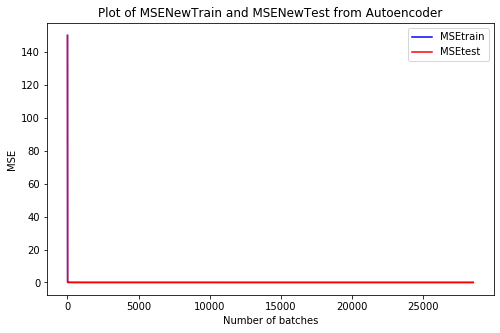

In [101]:
#plot MSE
labels=['MSEtrain','MSEtest']
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.figure(1)
plt.plot(mlpMyMonitorff.MSEtrain, label='MSENewTrain', color='b')
plt.plot(mlpMyMonitorff.MSEtest, label='MSENewTest', color='r')
plt.legend(labels)
plt.ylabel('MSE')
plt.xlabel('Number of batches')
plt.title('Plot of MSENewTrain and MSENewTest from Autoencoder')

In [105]:
z_trainff=mlpff.predict(Htrain)
MREPtrainff=np.average(abs(z_trainff-y_train)/y_train)
z_testff=mlpff.predict(Htest)
MREPtestff=np.average(abs(z_testff-y_test)/y_test)

Text(0.5, 1.0, 'Plot of TARGt_test and Zt_test from MLP')

<Figure size 432x288 with 0 Axes>

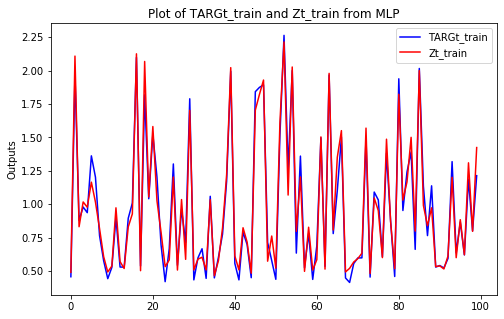

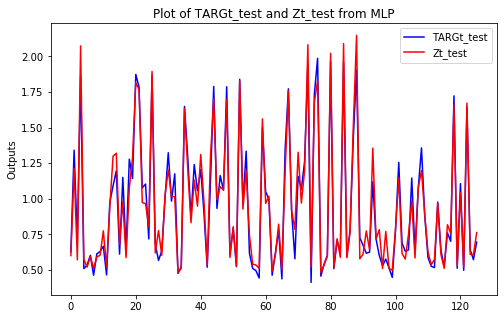

In [106]:

#plot TARGt vs Zt
labels1=['TARGt_train','Zt_train']
labels2=['TARGt_test','Zt_test']

%matplotlib inline
plt.figure(2)
plt.figure(figsize=(8, 5))
plt.plot(range(100), y_train[:100], color='b')
plt.plot(range(100),z_trainff[:100], color='r')
plt.legend(labels1)
plt.ylabel('Outputs')
plt.title('Plot of TARGt_train and Zt_train from MLP')


plt.figure(3)
plt.figure(figsize=(8, 5))
plt.plot(y_test, color='b')
plt.plot(z_testff, color='r')
plt.legend(labels2)
plt.ylabel('Outputs')
plt.title('Plot of TARGt_test and Zt_test from MLP')

In [108]:
MREPtrainff=np.average(abs(z_trainff-y_train)/y_train)
MREPtestff=np.average(abs(z_testff-y_test)/y_test)
print('MREPtrain:',round(MREPtrainff,3))
print('MREPtest:',round(MREPtestff,3))

MREPtrain: 0.079
MREPtest: 0.081
